<a href="https://colab.research.google.com/github/aparna-2001/cleveland-health-data-matrix-analysis/blob/main/Graph_theory_cleveland_health_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

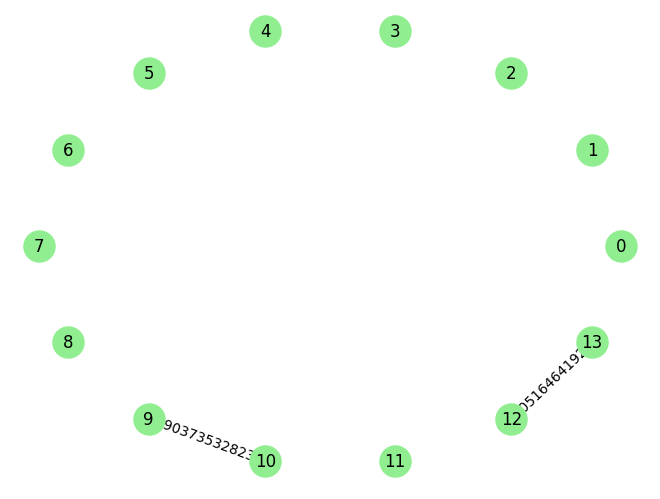

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  
Index(['oldpeak', 'slope', 'thal', 'condition'], dtype='object')


In [ ]:
#how to analyse a data to graph

import zipfile
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

zip_file = "archive.zip"
csv_file = "heart_cleveland_upload.csv"

with zipfile.ZipFile(zip_file, 'r') as zf:
    zf.extract(csv_file)

df = pd.read_csv(csv_file)
data_table = pd.DataFrame(df)
data_matrix = np.array(data_table)
#print(data_matrix)

#finding the correlation coefficient

correlation_matrix = np.corrcoef(data_matrix, rowvar=False)
#print(correlation_matrix)

#creating graph

G = nx.Graph()
for i in range(14):
    G.add_node(i)

#Adding edges for strong correlations
threshold = 0.5
for i in range(14):
    for j in range(i+1, 14):
      if abs(correlation_matrix[i,j])> threshold:
        G.add_edge(i,j, weight = correlation_matrix[i,j])


#drawing graph
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels = True, node_color= 'lightgreen', node_size = 500)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()

print(data_table.head())
print(data_table.columns[[9,10,12,13]])


**INFERENCE**

- From this we can understand 'oldpeak' and 'slope', 'thal' and 'condition' are correlated;
      - meaning the ST measurement of heart and ST slope are correlated
      